In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
def read_summary(filename):
    with open(filename, "r") as f:
        d = {"N":[], "s2": [], "s2_variance":[]}
        lines = f.readlines()
        for line in lines:
            s = line.split()
            values = s[1::2]
            d["N"].append(int(values[0]))
            d["s2"].append(float(values[1]))
            d["s2_variance"].append(float(values[2]))
        df = pd.DataFrame.from_dict(d)
        df = df.sort_values('N')
        return df

df_brute = read_summary("sum_brute/data_N.txt")
df_surv = read_summary("sum_surv/data_surv_bias_N.txt")


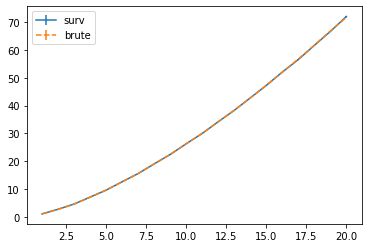

In [39]:
fig, ax = plt.subplots()
Ns = df_surv["N"]
Ns = Ns[Ns <= 20]
s2 = df_surv["s2"]
s2 = s2[Ns.index]
s2_vari = df_surv["s2_variance"]
s2_vari = s2_vari[s2.index]
s2_d = np.sqrt(s2_vari)

ax.errorbar(Ns, s2, yerr=s2_d, label="surv")

Ns = df_brute["N"]
Ns = Ns[Ns <= 20]
s2 = df_brute["s2"]
s2 = s2[Ns.index]
s2_vari = df_brute["s2_variance"]
s2_vari = s2_vari[s2.index]
s2_d = np.sqrt(s2_vari)

ax.errorbar(Ns, s2, yerr=s2_d, linestyle="--",label="brute")
ax.legend()

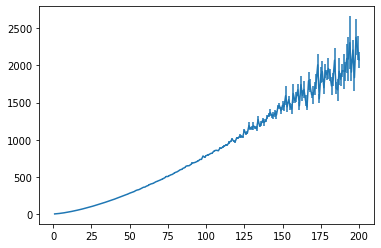

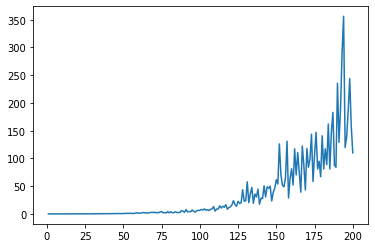

In [40]:
fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()
Ns = df_surv["N"]
s2 = df_surv["s2"]
s2_vari = df_surv["s2_variance"]
s2_d = np.sqrt(s2_vari)

ax.errorbar(Ns, s2, yerr=s2_d)

ax1.plot(Ns, s2_d)

In [ ]:
df_brute_20 = df_brute[df_brute["N"] <= 20]
df_surv_20 = df_surv[df_surv["N"] <= 20]

print(df_brute_20.to_markdown())
print(df_surv_20.to_markdown())